In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
%matplotlib inline

In [3]:
data = np.loadtxt("highp_finalresults.csv",skiprows=1,delimiter= ",")

In [4]:
#Hacemos una lista con los identificadores sin repetir de los planetas
col0 = list(set(np.int_(data[:,0])))
#Definimos el número de sistemas
n_sis = len(col0)

#Hacemos una lista con el numero de planetas por sistema
numPlanetas = np.ones(n_sis)
#Hacemos una lista con la masa total de los planetas por sistema
masaPlanetas = np.ones(n_sis)
#Hacemos una lista con la eficiencia de masa de los sistemas
eficienciaMasas = np.ones(n_sis)
#Hacemos una lista con la masa estelar del sistema
emestar = np.ones(n_sis)
#Hacemos una lista con el radio de corte del disco exterior
rc = np.ones(n_sis)
#Hacemos una lista con la maxima densidad superficial del polvo
sigmag_0 = np.ones(n_sis)
#Hacemos una lista con la masa del disco
emed = np.ones(n_sis)
#Hacemos una lista con la amplitud de perturbación 
apert = np.ones(n_sis)
#Hacemos una lista con la metalicidad
emetal = np.ones(n_sis)
#Hacemos una lista con la taza de disipacion de gas
taugas = np.ones(n_sis)

#LLenamos las listas
for i in range(n_sis):
    x=data[data[:,0]==col0[i]]
    numPlanetas[i] = len(x)
    masaPlanetas[i] = sum(x[:,5])
    eficienciaMasas[i] = masaPlanetas[i]/(x[0][11] /3.003E-6)
    emestar[i] =x[0][7]
    rc[i] = x[0][8]
    sigmag_0[i] = x[0][10]
    emed[i] = x[0][11]
    apert[i] = x[0][13]
    emetal[i] = x[0][16]
    taugas[i] = x[0][17]
    
#Una vez cargados los datos generamos la lista de datos de entrada Xs
Xs = np.array([emestar,rc,sigmag_0,emed,apert,emetal,taugas])
Xs = Xs.transpose()
#Ahora normalizamos Xs
scaler = preprocessing.StandardScaler().fit(Xs)
Xs=scaler.transform(Xs)
#Ahora partimos los datos Xs en X (con train, test) y Xv (validation)
Xv=[]
numPlanetasv=[]
masaPlanetasv=[]
eficienciaMasasv=[]
X=[]
numPlanetastt=[]
masaPlanetastt=[]
eficienciaMasastt=[]

for i in range(n_sis):
    if(i<(n_sis*0.1)):
        Xv.append(Xs[i])
        numPlanetasv.append(numPlanetas[i])
        masaPlanetasv.append(masaPlanetas[i])
        eficienciaMasasv.append(eficienciaMasas[i])
    else:
        X.append(Xs[i])
        numPlanetastt.append(numPlanetas[i])
        masaPlanetastt.append(masaPlanetas[i])
        eficienciaMasastt.append(eficienciaMasas[i])

#Ahora partimos X y los tt en train y test
X_train, X_test, numPlanetas_train, numPlanetas_test = train_test_split(X, numPlanetastt)
X_train, X_test, masaPlanetas_train, masaPlanetas_test = train_test_split(X, masaPlanetastt)
X_train, X_test, eficienciaMasas_train, eficienciaMasas_test = train_test_split(X, eficienciaMasastt)
    
n_train = len(X_train)
n_test =  len(X_test)
n_val = len(Xv)
    

In [5]:
#En este modulo nos vamos a enfocar en modelar la masa de  los planetas con el método de k-vecinos, que consiste en preguntarle 
#a los k sistemas más cercanos en terminos de sus valores de entrada la masa de sus planetasy luego hacer una votación
def kvecinos(data,point,k):
    #Definimos una lista con las distancia del punto a todo los puntos de X_train
    dist= np.ones(n_train)
    for i in range(n_train):
        dist[i] = np.sqrt((point[0]-X_train[i][0])**2.0 + (point[1]-X_train[i][1])**2.0 + (point[2]-X_train[i][2])**2.0 + (point[3]-X_train[i][3])**2.0 + (point[4]-X_train[i][4])**2.0 + (point[5]-X_train[i][5])**2.0 + (point[6]-X_train[i][6])**2.0) 
    #Ahora defino la lista que posee el numero de planetas que tienen lo kvecinos más cercanos
    masaPlanteasVecinos= np.ones(k)
    for i in range(k):
        ind = np.where(dist==min(dist))[0][0]
        masaPlanteasVecinos[i]=masaPlanetas_train[ind]
        dist= np.delete(dist,ind,0)
    #Aquí podemos tomar dos aproximaciones diferentes, contar el número de sistemas que tienen n planetas ó sumar el número 
    #de los planetas de los vecinos y asignar al nuestro el promedio. Hagmos el promedio
    return sum(masaPlanteasVecinos)/k

In [6]:
limite=10
limitei=1
#Definimos la lista con el error porcentual  para un k dado
aciertos=np.ones(limite-limitei)
#Vamos a ver cual k da el mejor modelo para ello calculamos el error porcentual promedio
for k in range(limitei,limite):
    errorporcentual=0
    for i in range(n_test):
        errorporcentual+=abs(masaPlanetas_test[i]-kvecinos(X_train,X_test[i],k))/(masaPlanetas_test[i])
    errorporcentual=errorporcentual/n_test
    aciertos[k-limitei]=errorporcentual*100.0
        
       

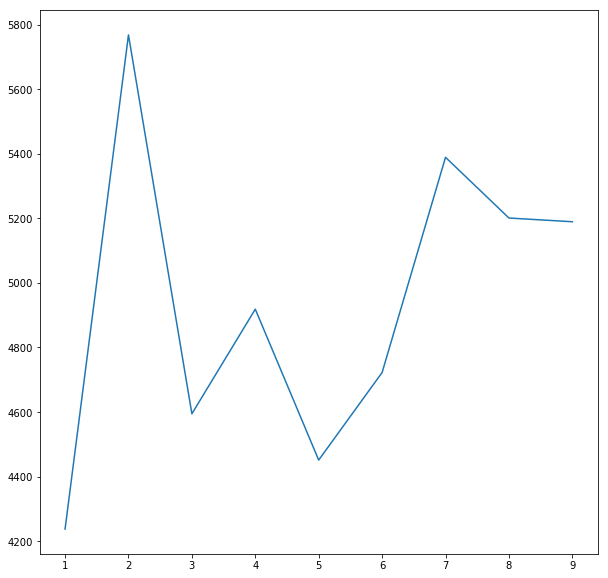

In [7]:
plt.figure(figsize=(10,10))
plt.plot(range(limitei,limite),aciertos)
plt.show()

In [8]:
limite=110
limitei=100
#Definimos la lista con el error porcentual  para un k dado
aciertos=np.ones(limite-limitei)
#Vamos a ver cual k da el mejor modelo para ello calculamos el error porcentual promedio
for k in range(limitei,limite):
    errorporcentual=0
    for i in range(n_test):
        errorporcentual+=abs(masaPlanetas_test[i]-kvecinos(X_train,X_test[i],k))/(masaPlanetas_test[i])
    errorporcentual=errorporcentual/n_test
    aciertos[k-limitei]=errorporcentual*100.0

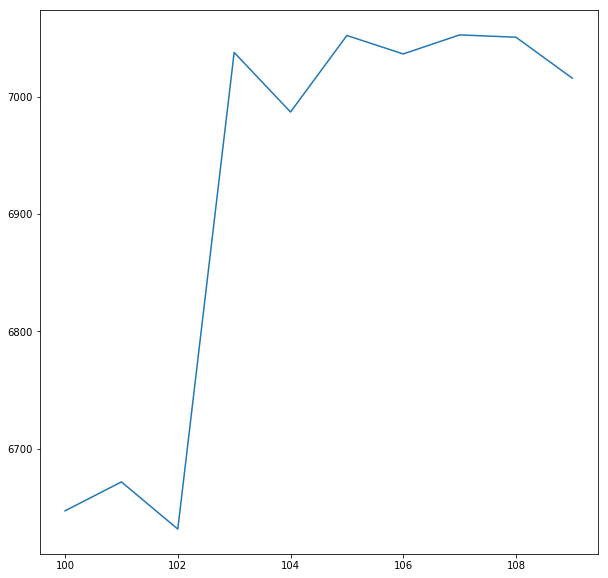

In [9]:
plt.figure(figsize=(10,10))
plt.plot(range(limitei,limite),aciertos)
plt.show()

In [ ]:
#Podemos ver que el error porcentual es mucho más del 100% este método no funcona